In [13]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_scores = model.predict_proba(X_test)[:,1]


In [18]:
y_scores

array([0.04953645, 0.17458491, 0.09361582, 0.25506003, 0.63545897,
       0.11671163, 0.06566771, 0.42191053, 0.04866207, 0.57563941,
       0.33875961, 0.41305442, 0.698545  , 0.19962867, 0.0200171 ,
       0.82471557, 0.86657043, 0.03101009, 0.25510208, 0.89492802,
       0.95246636, 0.83476497, 0.11740929, 0.44668874, 0.08923367,
       0.06882575, 0.6511721 , 0.41198023, 0.17859648, 0.28689326,
       0.24545459, 0.43903587, 0.00942457, 0.24259972, 0.35174019,
       0.96164586, 0.34356778, 0.80926613, 0.29380631, 0.05083006,
       0.18184421, 0.08671618, 0.42230468, 0.18737798, 0.03011576,
       0.03949117, 0.24741002, 0.42783904, 0.10528783, 0.37969706,
       0.99355852, 0.10665433, 0.39098779, 0.76882946, 0.36866251,
       0.45776424, 0.95035641, 0.41991933, 0.39153248, 0.04375926,
       0.37293767, 0.90130119, 0.88176993, 0.8884347 , 0.3308308 ,
       0.0693074 , 0.95265277, 0.20054979, 0.26055474, 0.35465485,
       0.10359038, 0.08168198, 0.45042837, 0.09220933, 0.08648

In [7]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [8]:
thresholds

array([       inf, 0.99355852, 0.95265277, 0.95246636, 0.82471557,
       0.76882946, 0.76197417, 0.6838585 , 0.67529527, 0.67422906,
       0.6511721 , 0.65083646, 0.63545897, 0.58629974, 0.57563941,
       0.5697279 , 0.52513371, 0.47017519, 0.4613146 , 0.45042837,
       0.43903587, 0.43865112, 0.42230468, 0.41991933, 0.41305442,
       0.41198023, 0.40477976, 0.37969706, 0.36866251, 0.31019029,
       0.30880505, 0.27771478, 0.27207341, 0.25510208, 0.25506003,
       0.24741002, 0.24545459, 0.23666836, 0.22886112, 0.18184421,
       0.17859648, 0.17458491, 0.17325369, 0.14637589, 0.14074527,
       0.11671163, 0.11494538, 0.11000285, 0.10665433, 0.08923367,
       0.08671618, 0.0200171 , 0.01931319, 0.00160778])

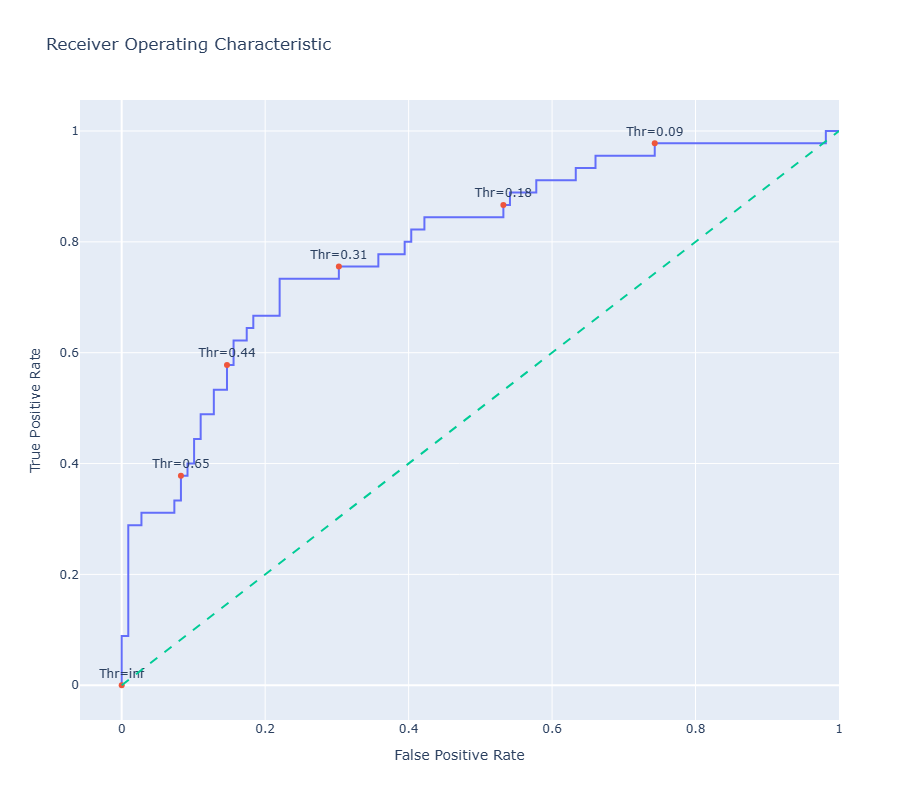

In [19]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [10]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.36866250729935063


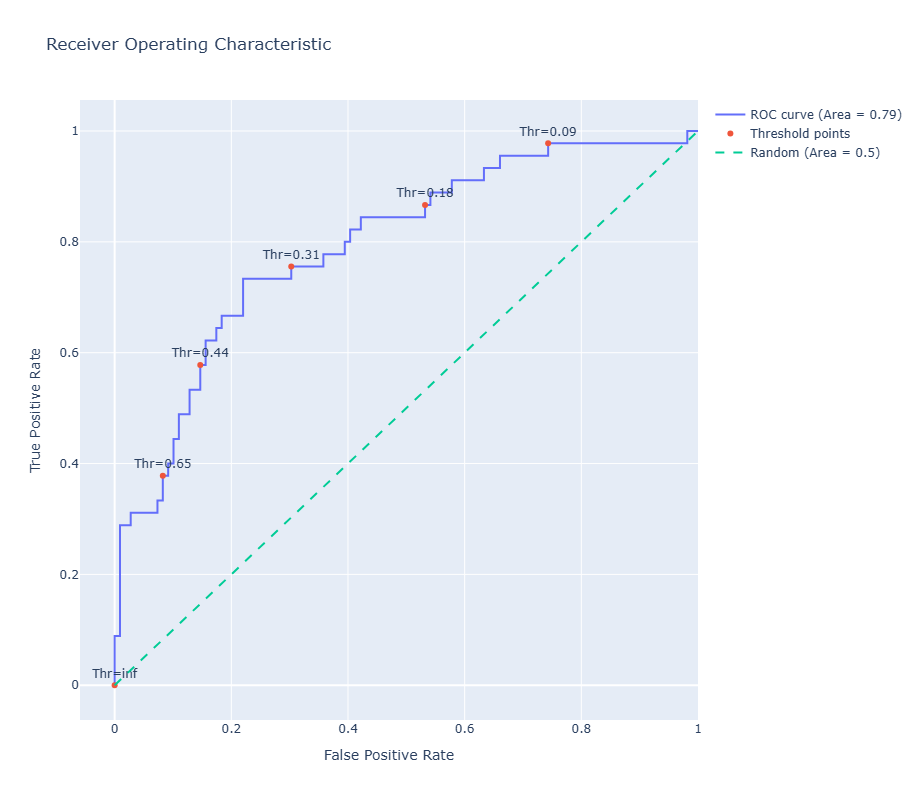

In [20]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


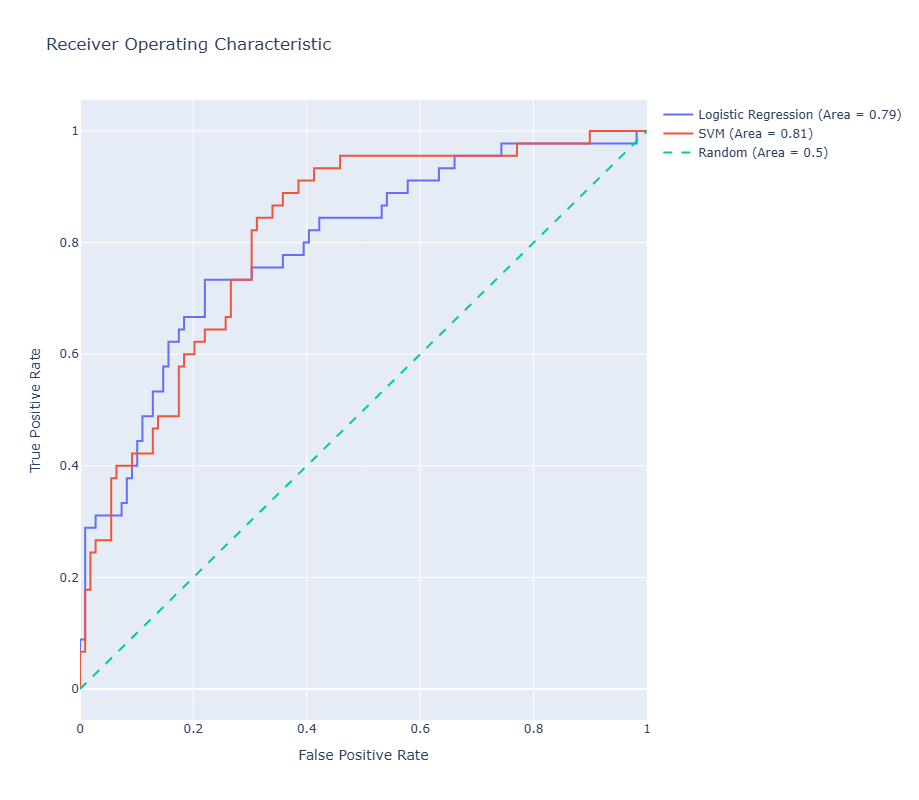

In [21]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# SVM requires feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_scores = svm_model.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()
